In [1]:
# importing MNIST hand-written digit image data set
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()


print("number of training samples= ", len(X_train))
print("number of testing samples= ", len(y_test))

#normalizing pixel values
X_train = X_train / 255
X_test = X_test / 255

11490434/11490434 [==============================] - 1s 0us/step
number of training samples=  60000
number of testing samples=  10000


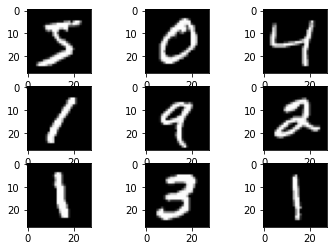

In [2]:
from matplotlib import pyplot as plt

#sample images
for i in range(0, 9):
	plt.subplot(330+1+i)
	plt.imshow(X_train[i],cmap='gray')
plt.show()

In [3]:
#flattening 28 x 28 input images to 784 x 1
print(X_train[0].shape)
X_trn = []
for i in X_train:
  X_trn.append(i.flatten())

X_tst = []
for i in X_test:
  X_tst.append(i.flatten())

print(X_trn[0].shape)

(28, 28)
(784,)


In [4]:
from tensorflow.keras.utils import to_categorical

#one hot encoding of output data
print(y_train[0])
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)
print(train_labels[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [5]:
#intializing the model

from keras import models
from keras import layers

network = models.Sequential()

In [ ]:
# simple single layer network with 10 neurons (Model 0 and Model 1)

network.add(layers.Dense(10, activation='softmax', input_shape=(784,)))

In [ ]:
# Network with 2 layers. (Model 2)

network.add(layers.Dense(16, activation='relu', input_shape=(784,)))

network.add(layers.Dense(10, activation='softmax'))

In [11]:
# Network with 2 layers. (Model 3)

network.add(layers.Dense(16, activation='tanh', input_shape=(784,)))

network.add(layers.Dense(10, activation='softmax'))

In [ ]:
# Network with 3 layers. (Model 4)

network.add(layers.Dense(50, activation='relu', input_shape=(784,)))
network.add(layers.Dense(100, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))


In [6]:
# Network with 3 layers. (Model 5)

network.add(layers.Dense(50, activation='relu', input_shape=(784,)))
network.add(layers.Dropout(0.25))
network.add(layers.Dense(100, activation='relu'))
network.add(layers.Dropout(0.35))
network.add(layers.Dense(10, activation='softmax'))

In [7]:
#to build the model and get the summary

network.build()
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                39250     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 45,360
Trainable params: 45,360
Non-trainable params: 0
_________________________________________________________________


In [8]:
#training the model

import tensorflow as tf
import numpy as np

network.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

hist = network.fit(tf.convert_to_tensor(X_trn), train_labels, epochs=100, batch_size=100,validation_split=0.2)

model_data = hist.history

print('Train Accuracy: ', np.mean(model_data['accuracy']), '\nTrain Loss: ', np.mean(model_data['loss']))
print('Validation Accuracy: ', np.mean(model_data['val_accuracy']), '\nValidation Loss: ', np.mean(model_data['val_loss']))

Epoch 1/100
480/480 [==============================] - 4s 4ms/step - loss: 0.6484 - accuracy: 0.7992 - val_loss: 0.2314 - val_accuracy: 0.9313
Epoch 2/100
480/480 [==============================] - 2s 3ms/step - loss: 0.3303 - accuracy: 0.9034 - val_loss: 0.1846 - val_accuracy: 0.9437
Epoch 3/100
480/480 [==============================] - 2s 3ms/step - loss: 0.2674 - accuracy: 0.9214 - val_loss: 0.1582 - val_accuracy: 0.9530
Epoch 4/100
480/480 [==============================] - 2s 3ms/step - loss: 0.2379 - accuracy: 0.9281 - val_loss: 0.1427 - val_accuracy: 0.9579
Epoch 5/100
480/480 [==============================] - 2s 3ms/step - loss: 0.2170 - accuracy: 0.9359 - val_loss: 0.1356 - val_accuracy: 0.9602
Epoch 6/100
480/480 [==============================] - 2s 3ms/step - loss: 0.1985 - accuracy: 0.9397 - val_loss: 0.1338 - val_accuracy: 0.9604
Epoch 7/100
480/480 [==============================] - 2s 4ms/step - loss: 0.1847 - accuracy: 0.9439 - val_loss: 0.1247 - val_accuracy: 0.9626

In [9]:
#evaluating the model

test_loss, test_acc = network.evaluate(tf.convert_to_tensor(X_tst), test_labels)
print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.1196 - accuracy: 0.9720
Test Accuracy:  0.972000002861023 
Test Loss:  0.11964670568704605


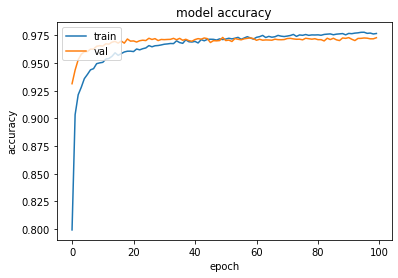

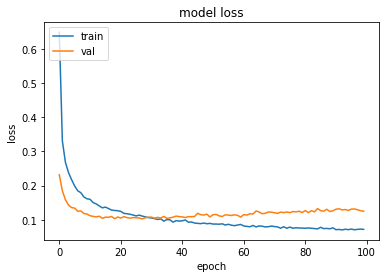

In [10]:
#plotting history for accuracy & loss for training and validation data.

import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()